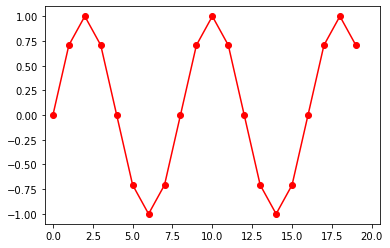

In [1]:
import numpy as np
from matplotlib import pyplot as plt
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s,'ro-')
plt.xlim(-0.5,20.5)
plt.ylim(-1.1,1.1)
plt.show() 

In [2]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
S[:5, :3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [3]:
X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1,3]
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

In [4]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

np.random.seed(0)
model = Sequential()
model.add(SimpleRNN(10, input_shape=(3,1)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='sgd')
model.summary()

NotImplementedError: Cannot convert a symbolic Tensor (simple_rnn/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [ ]:
plt.plot(Y_train, 'ro-', label= 'target')
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label='output')
plt.xlim(-0.5,20.5)
plt.ylim(-1.1,1.1)
plt.legend()
plt.title('Before training')
plt.show()

In [ ]:
history = model.fit(X_train,Y_train, epochs = 100, verbose=0)

In [ ]:
plt.plot(history.history['loss'])
plt.title('loss')
plt.show()

In [ ]:
plt.plot(Y_train, 'ro-', label= 'target')
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label='output')
plt.xlim(-0.5,20.5)
plt.ylim(-1.1,1.1)
plt.legend()
plt.title('After training')
plt.show()